## Request json data from URL

In [1]:
import requests

In [2]:
# use python simple server to serve json
URL = "http://localhost:8000/quiz-export.json"

In [3]:
r = requests.get(url = URL)

In [4]:
data = r.json()

In [5]:
# get only team21 data
team21_data = data['quiz']['sensor']['team21']

## Transform data

In [31]:
tmp_data = []

for key in team21_data.keys():
    if 'DevEUI_uplink' in team21_data[key].keys():
        uplink = team21_data[key]['DevEUI_uplink']
        try:
            tmp_data.append({
                "lat": uplink['LrrLAT'],
                "lng": uplink['LrrLON'],
                "time": ' '.join(uplink['Time'].split('.')[0].split('T')),
                "date": uplink['Time'].split('.')[0].split('T')[0],
                "isoTime": uplink['Time'],
                "pm25": int(uplink['payload_hex'][2:4], 16)
            })
        except:
            print(key, uplink)
print(tmp_data)

-Lwgt--mVCqAfVvk9ViD {'ADRbit': '1', 'Channel': 'LC6', 'CustomerData': {'alr': {'pro': 'LORA/Generic', 'ver': '1'}}, 'CustomerID': '1100008601', 'DevAddr': 'E01B8A82', 'DevEUI': 'AA00DBCA14EF1421', 'DevLrrCnt': '1', 'FCntDn': '1', 'FCntUp': '2', 'InstantPER': '0.000000', 'Late': '0', 'Lrcid': '00000231', 'LrrLAT': '13.844980', 'LrrLON': '100.584175', 'LrrRSSI': '-118.000000', 'LrrSNR': '-8.750000', 'Lrrid': '10000787', 'Lrrs': {'Lrr': [{'Chain': '0', 'LrrESP': '-127.293648', 'LrrRSSI': '-118.000000', 'LrrSNR': '-8.750000', 'Lrrid': '10000787'}]}, 'MType': '2', 'MeanPER': '0.000000', 'ModelCfg': '0', 'SpFact': '10', 'SubBand': 'G1', 'Time': '2019-12-22T16:15:35.999+07:00', 'mic_hex': '7b932131'}
-Lwgv1t6_fgk70sP93u9 {'ADRbit': '1', 'Channel': 'LC2', 'CustomerData': {'alr': {'pro': 'LORA/Generic', 'ver': '1'}}, 'CustomerID': '1100008601', 'DevAddr': 'E01B8A82', 'DevEUI': 'AA00DBCA14EF1421', 'DevLrrCnt': '1', 'FCntDn': '1', 'FCntUp': '1', 'InstantPER': '0.000000', 'Late': '0', 'Lrcid': '0

## Into the pandas

In [32]:
# import pandas module
import pandas as pd

In [33]:
# Turn list of dicts to dataFrame
data = pd.DataFrame(tmp_data)

In [34]:
data

,lat,lng,time,date,isoTime,pm25
0,13.836809,100.530807,2019-12-19 09:51:45,2019-12-19,2019-12-19T09:51:45.312+07:00,14
1,13.836794,100.530830,2019-12-19 09:53:30,2019-12-19,2019-12-19T09:53:30.818+07:00,4
2,13.836771,100.530838,2019-12-19 09:56:05,2019-12-19,2019-12-19T09:56:05.09+07:00,4
3,13.836788,100.530823,2019-12-19 09:57:50,2019-12-19,2019-12-19T09:57:50.554+07:00,4
4,13.836770,100.530838,2019-12-19 10:01:16,2019-12-19,2019-12-19T10:01:16.019+07:00,5
...,...,...,...,...,...,...
716,14.961973,102.118156,2019-12-31 00:54:59,2019-12-31,2019-12-31T00:54:59.799+07:00,3
717,14.961973,102.118156,2019-12-31 00:55:28,2019-12-31,2019-12-31T00:55:28.715+07:00,3
718,14.961973,102.118156,2019-12-31 00:55:36,2019-12-31,2019-12-31T00:55:36.715+07:00,3
719,14.961973,102.118156,2019-12-31 08:15:58,2019-12-31,2019-12-31T08:15:58.268+07:00,2


In [35]:
# clear error data (191 value)
data = data[data['pm25'] != 191]

In [36]:
data.describe()

,pm25
count,598.000000
mean,7.759197
std,14.038791
min,0.000000
25%,2.000000
50%,4.000000
75%,8.000000
max,158.000000


## Plot data

In [37]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
sns.set(style="white", context="talk")

In [39]:
data

,lat,lng,time,date,isoTime,pm25
0,13.836809,100.530807,2019-12-19 09:51:45,2019-12-19,2019-12-19T09:51:45.312+07:00,14
1,13.836794,100.530830,2019-12-19 09:53:30,2019-12-19,2019-12-19T09:53:30.818+07:00,4
2,13.836771,100.530838,2019-12-19 09:56:05,2019-12-19,2019-12-19T09:56:05.09+07:00,4
3,13.836788,100.530823,2019-12-19 09:57:50,2019-12-19,2019-12-19T09:57:50.554+07:00,4
4,13.836770,100.530838,2019-12-19 10:01:16,2019-12-19,2019-12-19T10:01:16.019+07:00,5
...,...,...,...,...,...,...
716,14.961973,102.118156,2019-12-31 00:54:59,2019-12-31,2019-12-31T00:54:59.799+07:00,3
717,14.961973,102.118156,2019-12-31 00:55:28,2019-12-31,2019-12-31T00:55:28.715+07:00,3
718,14.961973,102.118156,2019-12-31 00:55:36,2019-12-31,2019-12-31T00:55:36.715+07:00,3
719,14.961973,102.118156,2019-12-31 08:15:58,2019-12-31,2019-12-31T08:15:58.268+07:00,2


In [40]:
time_series = pd.to_datetime(data['isoTime'].astype('datetime64[ns]'))
data['time'] = time_series
df = data.set_index('time')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [43]:
df.groupby(pd.Grouper(level='time',freq='H')).mean().dropna()

,pm25
time,
2019-12-19 02:00:00,6.5
2019-12-19 03:00:00,5.0
2019-12-20 02:00:00,5.2
2019-12-20 11:00:00,5.0
2019-12-20 12:00:00,1.5
...,...
2019-12-30 07:00:00,1.0
2019-12-30 11:00:00,139.5
2019-12-30 14:00:00,1.0


Text(0, 0.5, 'PM 2.5')

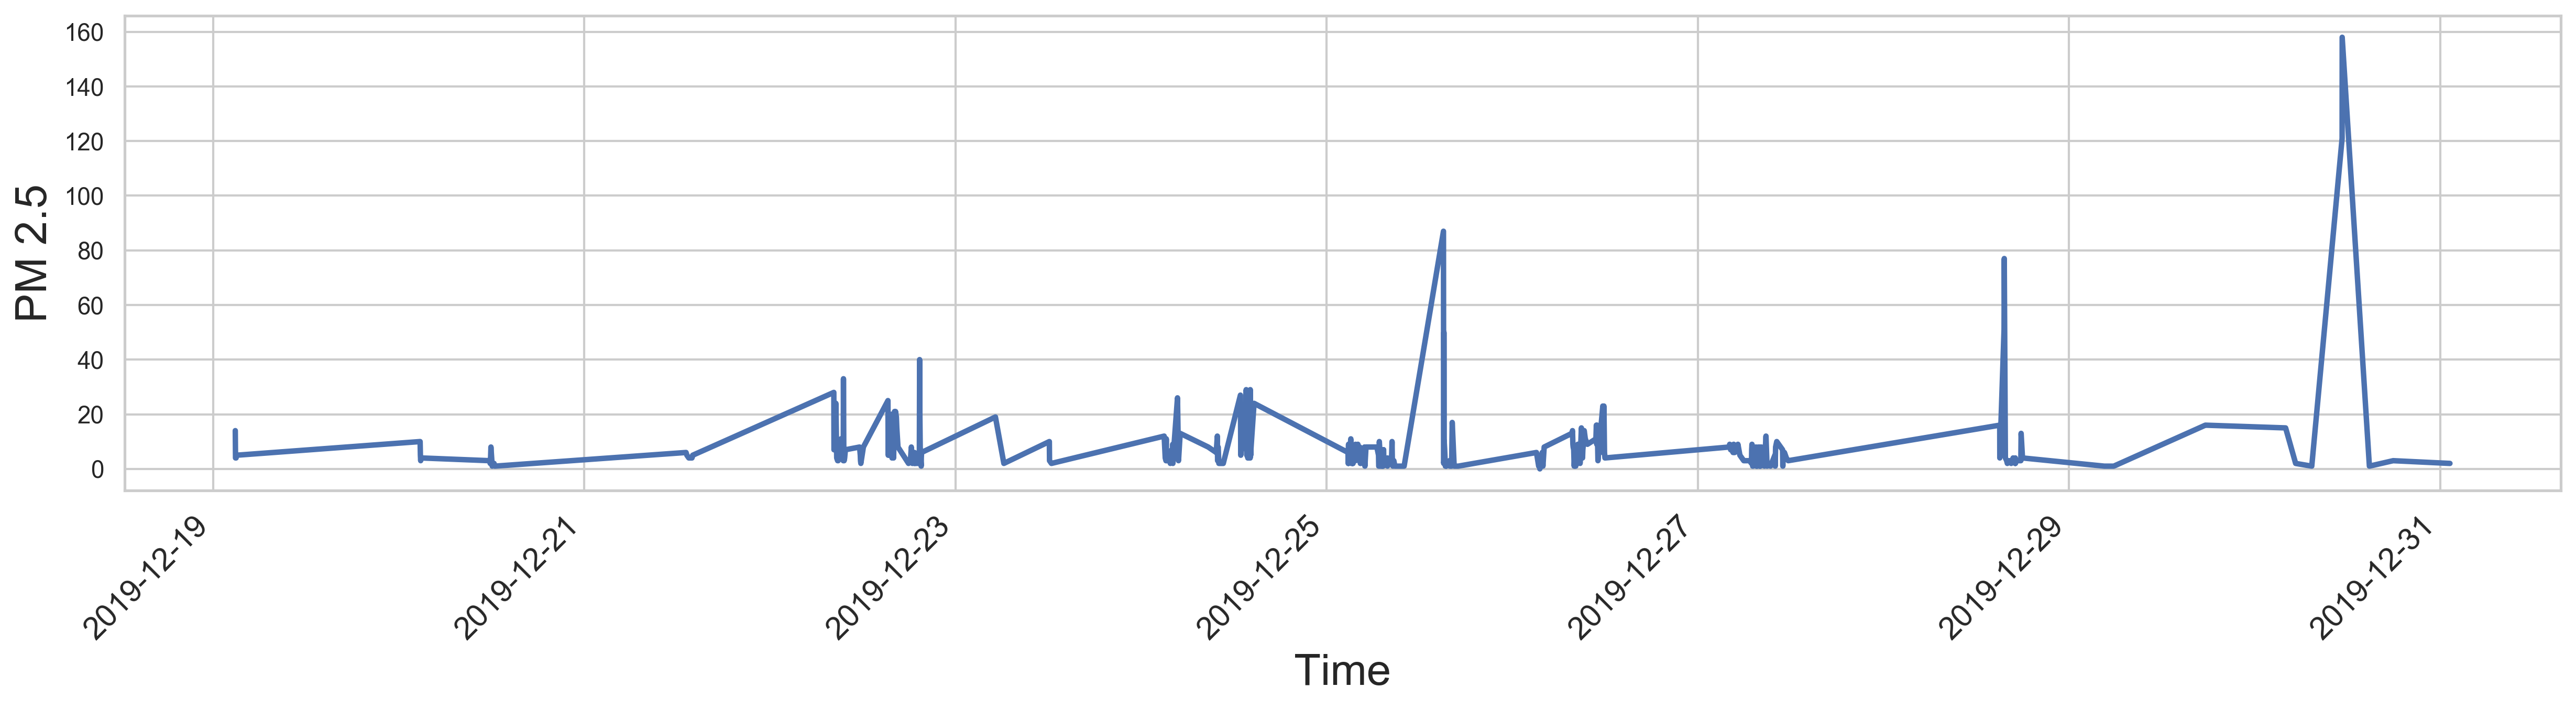

In [86]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,4), dpi=300)
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'
)
chart = sns.lineplot(x=df.index, y=df['pm25'], palette="tab10", linewidth=2.5)
chart.set_xlabel("Time", fontsize=20)
chart.set_ylabel("PM 2.5", fontsize=20)
# chart.set(xlabel='Date', ylabel='PM 2.5')
# plt.show()